In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(A):
    return 1/(1 + np.exp(-A))

def sigmoid_derivate(A):
    return A*(1-A)

class NeuralNetwork:
    def __init__(self, num_capas, neuronas_por_capa, num_entradas, alfa):
        
        self.num_capas = num_capas
        self.num_entradas = num_entradas
        
        #Configurando los pesos W de la capa 1.
        neuronas_capa_inicial = neuronas_por_capa[0]
        self.W_capas = [np.random.uniform(-1, 1, neuronas_capa_inicial*(num_entradas+1)).reshape((neuronas_capa_inicial, num_entradas+1))]
        
        #Configurando los pesos W de las capas posteriores.
        for i in range(1, num_capas):
            neuronas_capa_i = neuronas_por_capa[i]
            num_entradas_capa = neuronas_por_capa[i-1]
            self.W_capas.append(np.random.uniform(-1, 1, neuronas_capa_i*(num_entradas_capa+1)).reshape((neuronas_capa_i, num_entradas_capa+1)))
            
        self.alfa = alfa
        
        self.errores = []
        
    def train(self, X, T, epocas):
            
        #Se aumentan los vectores de entrada para incluir el bias.
        bias = -np.ones((np.shape(X)[0], 1))
        X_a = np.concatenate([X, bias], axis = 1)
        
        for i in range(epocas):
            
            E = 0
            
            #Se recorren todos los patrones de entrenamiento.
            for x, t in zip(X_a, T):
                
                #print(f"T shape: {np.shape(np.reshape(t, (-1, 1)))}")
                resultados_capas = [np.reshape(x, (-1, 1))]
                deltas_capas = [None] * self.num_capas
                
                #Se calcula la salida de la primera capa.
                mult_res = np.matmul(self.W_capas[0], np.reshape(x, (-1, 1)))
                sigmoid_res = sigmoid(mult_res)
                resultados_capas.append(np.vstack([sigmoid_res, [-1]]))
                
                for capa in range(1, num_capas):
                    #Se aumenta el vector de la capa anterior para incluir el bias.
                    res_capa_previa = np.vstack([sigmoid_res, [-1]])
                    mult_res = np.matmul(self.W_capas[capa], res_capa_previa)
                    sigmoid_res = sigmoid(mult_res)
                    resultados_capas.append(np.vstack([sigmoid_res, [-1]]))
                
                #print(f"Resultado final capa final: {resultados_capas[-1]}")
                #print(f"Esperado: {t}")
                E += (1/2)*((resultados_capas[-1][0, 0] - t[0])**2)
                
                delta_salida = sigmoid_derivate(sigmoid_res)*(np.reshape(t, (-1, 1)) - sigmoid_res)
                deltas_capas[-1] = delta_salida
                
                delta_w = self.alfa * np.matmul(deltas_capas[-1], np.transpose(resultados_capas[-1-1]))
                self.W_capas[-1] += delta_w
                
                for i in range(1, self.num_capas):
                    sum_delta_w = np.matmul(np.transpose(self.W_capas[-i]), deltas_capas[-i])
                    delta = sigmoid_derivate(resultados_capas[-1-i])*sum_delta_w
                    deltas_capas[-1-i] = delta[:-1, :]
                    
                    delta_w = self.alfa * np.matmul(delta[:-1, :], np.transpose(resultados_capas[-1-1-i]))
                    self.W_capas[-1-i] += delta_w
            
            E /= np.shape(X)[0]
            self.errores.append(E)
            #print(f"Error general: {E}")
                    
    def classify(self, x):
        #Se aumenta el vector de entrada para incluir el bias.
        x_a = np.concatenate([x, [-1]])

        #print(f"T shape: {np.shape(np.reshape(t, (-1, 1)))}")
        resultados_capas = [np.reshape(x_a, (-1, 1))]
        deltas_capas = [None] * self.num_capas

        #Se calcula la salida de la primera capa.
        mult_res = np.matmul(self.W_capas[0], np.reshape(x_a, (-1, 1)))
        sigmoid_res = sigmoid(mult_res)
        resultados_capas.append(np.vstack([sigmoid_res, [-1]]))

        for capa in range(1, num_capas):
            #Se aumenta el vector de la capa anterior para incluir el bias.
            res_capa_previa = np.vstack([sigmoid_res, [-1]])
            mult_res = np.matmul(self.W_capas[capa], res_capa_previa)
            sigmoid_res = sigmoid(mult_res)
            resultados_capas.append(np.vstack([sigmoid_res, [-1]]))
        
        #print(f"Resultados de {x}")
        #print(f"{resultados_capas}")
        
        return resultados_capas
                                        
            

Pesos capa intermedia: 
[[ 0.35144405 -0.60125262 -0.2011797 ]
 [ 0.13590193 -0.16025525  0.11310312]]
Pesos capa salida: 
[[-0.75672717 -0.62175325  0.41298628]]


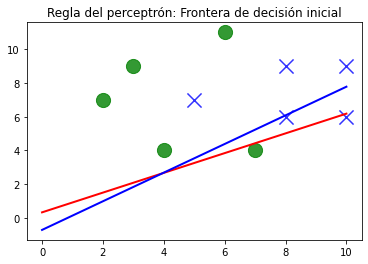

In [8]:
num_capas = 2
neuronas_por_capa = [2, 1]
num_entradas = 2
alfa = 0.1
NN = NeuralNetwork(num_capas, neuronas_por_capa, num_entradas, alfa)
#NN.train(X, T)

X = np.array([[2.0, 7.0], [3.0, 9.0], [4.0, 4.0], [6.0, 11.0], [7.0, 4.0], [5.0, 7.0], [8.0, 6.0], [8.0, 9.0], [10.0, 6.0], [10.0, 9.0]])
T = np.array([[0.0], [0.0], [0.0], [0.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0]])

x1 = np.linspace(0, 10)
x2 = (NN.W_capas[0][0, 2] / NN.W_capas[0][0, 1]) - (x1 * NN.W_capas[0][0, 0] / NN.W_capas[0][0, 1])
x3 = (NN.W_capas[0][1, 2] / NN.W_capas[0][1, 1]) - (x1 * NN.W_capas[0][1, 0] / NN.W_capas[0][1, 1])
plt.figure(1)
plt.plot(x1, x2, 'red', linewidth = 2)
plt.plot(x1, x3, 'blue', linewidth = 2)

for x, t in zip(X, T):
    if t[0] <= 0:
        plt.scatter(x[0], x[1], color = 'g', s = 200, marker = 'o', alpha = 0.8)
    else:
        plt.scatter(x[0], x[1], color = 'b', s = 200, marker = 'x', alpha = 0.8)

print("Pesos capa intermedia: ")
print(NN.W_capas[0])
print("Pesos capa salida: ")
print(NN.W_capas[1])
plt.title('Regla del perceptrón: Frontera de decisión inicial')
plt.show()


Pesos iniciales: 
Capa intermedia: 
[[ 0.35144405 -0.60125262 -0.2011797 ]
 [ 0.13590193 -0.16025525  0.11310312]]
Capa de salida: 
[[-0.75672717 -0.62175325  0.41298628]]
Pesos finales: 
Capa intermedia: 
[[-0.05617479 -1.77525534 -8.75618808]
 [-4.08846844  2.59809745  0.77432246]]
Capa de salida: 
[[-9.01826999 -7.62932757 -3.90165997]]


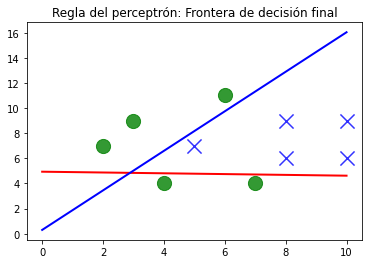

In [9]:
print("Pesos iniciales: ")
print("Capa intermedia: ")
print(NN.W_capas[0])
print("Capa de salida: ")
print(NN.W_capas[1])
NN.alfa = 0.25
NN.train(X, T, 3000)
print("Pesos finales: ")
print("Capa intermedia: ")
print(NN.W_capas[0])
print("Capa de salida: ")
print(NN.W_capas[1])

x1 = np.linspace(0, 10)
x2 = (NN.W_capas[0][0, 2] / NN.W_capas[0][0, 1]) - (x1 * NN.W_capas[0][0, 0] / NN.W_capas[0][0, 1])
x3 = (NN.W_capas[0][1, 2] / NN.W_capas[0][1, 1]) - (x1 * NN.W_capas[0][1, 0] / NN.W_capas[0][1, 1])
plt.figure(1)
plt.plot(x1, x2, 'red', linewidth = 2)
plt.plot(x1, x3, 'blue', linewidth = 2)

for x, t in zip(X, T):
    if t[0] <= 0.5:
        plt.scatter(x[0], x[1], color = 'g', s = 200, marker = 'o', alpha = 0.8)
    else:
        plt.scatter(x[0], x[1], color = 'b', s = 200, marker = 'x', alpha = 0.8)

plt.title('Regla del perceptrón: Frontera de decisión final')
plt.show()

Patron [3. 7.] con salida 0.02036298820579983
Patron [8. 8.] con salida 0.9797051033751076


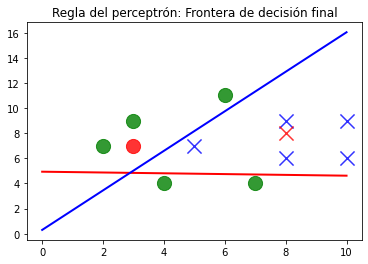

In [13]:
x2 = (NN.W_capas[0][0, 2] / NN.W_capas[0][0, 1]) - (x1 * NN.W_capas[0][0, 0] / NN.W_capas[0][0, 1])
x3 = (NN.W_capas[0][1, 2] / NN.W_capas[0][1, 1]) - (x1 * NN.W_capas[0][1, 0] / NN.W_capas[0][1, 1])
plt.figure(1)
plt.plot(x1, x2, 'red', linewidth = 2)
plt.plot(x1, x3, 'blue', linewidth = 2)

for x, t in zip(X, T):
    if t[0] <= 0.5:
        plt.scatter(x[0], x[1], color = 'g', s = 200, marker = 'o', alpha = 0.8)
    else:
        plt.scatter(x[0], x[1], color = 'b', s = 200, marker = 'x', alpha = 0.8)
        
test_X = np.array([[3.0, 7.0], [8.0, 8.0]])
for p in test_X:
    resultado = NN.classify(p)
    print(f"Patron {p} con salida {resultado[-1][0, 0]}")
    if resultado[-1][0, 0] <= 0.5:
        plt.scatter(p[0], p[1], color = 'r', s = 200, marker = 'o', alpha = 0.8)
    else:
        plt.scatter(p[0], p[1], color = 'r', s = 200, marker = 'x', alpha = 0.8)

plt.title('Regla del perceptrón: Frontera de decisión final')
plt.show()

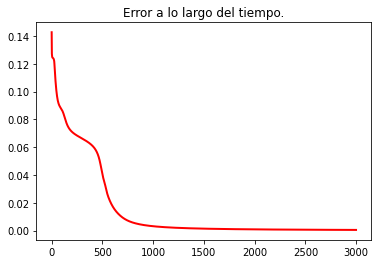

In [11]:
errores = []
for e in NN.errores:
    errores.append(e)

e = np.array(errores)

plt.figure(1)
plt.plot(e, 'red', linewidth = 2)

plt.title('Error a lo largo del tiempo.')
plt.show()

Pesos capa intermedia: 
[[-0.05617479 -1.77525534 -8.75618808]
 [-4.08846844  2.59809745  0.77432246]]
Pesos capa de salida: 
[[-9.01826999 -7.62932757 -3.90165997]]


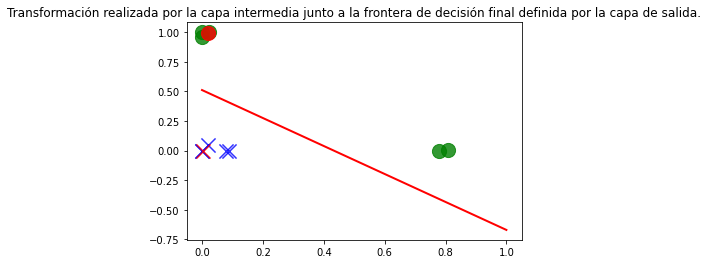

In [12]:
plt.figure(1)
test_X = np.array([[3.0, 7.0], [8.0, 8.0]])

print("Pesos capa intermedia: ")
print(NN.W_capas[0])
print("Pesos capa de salida: ")
print(NN.W_capas[1])

for p, t in zip(X, T):
    transformed_pattern = np.matmul(NN.W_capas[0][:,:-1], np.reshape(p, (2, -1)))
    #print(transformed_pattern)
    transformed_pattern[0, 0] -= NN.W_capas[0][0,-1]
    transformed_pattern[1, 0] -= NN.W_capas[0][1,-1]
    transformed_pattern = sigmoid(transformed_pattern)
    if t[0] <= 0.5:
        plt.scatter(transformed_pattern[0, 0], transformed_pattern[1, 0], color = 'g', s = 200, marker = 'o', alpha = 0.8)
    else:
        plt.scatter(transformed_pattern[0, 0], transformed_pattern[1, 0], color = 'b', s = 200, marker = 'x', alpha = 0.8)    

for p in test_X:
    transformed_pattern = np.matmul(NN.W_capas[0][:,:-1], np.reshape(p, (2, -1)))
    #print(transformed_pattern)
    transformed_pattern[0, 0] -= NN.W_capas[0][0,-1]
    transformed_pattern[1, 0] -= NN.W_capas[0][1,-1]
    transformed_pattern = sigmoid(transformed_pattern)
    resultado = NN.classify(p)
    if resultado[-1][0, 0] <= 0.5:
        plt.scatter(transformed_pattern[0, 0], transformed_pattern[1, 0], color = 'r', s = 200, marker = 'o', alpha = 0.8)
    else:
        plt.scatter(transformed_pattern[0, 0], transformed_pattern[1, 0], color = 'r', s = 200, marker = 'x', alpha = 0.8)
        

x1_l = np.linspace(0, 1)
x2_l = (NN.W_capas[-1][0, 2] / NN.W_capas[-1][0, 1]) - (x1_l * NN.W_capas[-1][0, 0] / NN.W_capas[-1][0, 1])
plt.figure(1)
plt.plot(x1_l, x2_l, 'red', linewidth = 2)


plt.title('Transformación realizada por la capa intermedia junto a la frontera de decisión final definida por la capa de salida.')
plt.show()